# Load data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv('data/who_life_exp.csv')

In [3]:
data_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


# Khám Phá dữ liệu

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows, num_cols = data_df.shape

In [5]:
num_rows, num_cols

(3111, 32)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một quốc gia về các yếu tố ảnh hưởng đến tuổi thọ, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [6]:
data_df.duplicated().sum()

0

- Vậy bộ dữ liệu này không có dòng nào bị lặp

## Mỗi cột có ý nghĩa gì?

|Tên thuộc tính | Mô tả |
|:------:| ---|
|Country| Tên quốc gia|
|country_code| Định danh ba chữ cái của một quốc gia|
|region| Khu vực toàn cầu của đất nước|
|year| Năm|
|life_expect| Tuổi thọ trung bình (tuổi)|
|life_exp60| Tuổi thọ trung bình 60(tuổi)|
|adult_mortality|Tỷ lệ tử vong ở người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận|
|bmi|BMI trung bình (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ gầy ở trẻ em và thanh thiếu niên|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên|
|hepatitis|Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm chủng liều đầu tiên (MCV1) có chứa vắc xin sởi cho trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Dân số sử dụng ít nhất các dịch vụ nước uống đạt tiêu chuẩn|
|doctors|Bác sĩ y khoa (trên 10.000)|
|hospitals|Tổng mật độ trên 100.000 dân: Bệnh viện|
|gni_capita|Tổng thu nhập quốc nội trên đầu người|
|gghe-d	|Chi tiêu chung cho y tế của chính phủ trong nước tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (hàng nghìn)|
|une_infant|Tỷ lệ tử vong, trẻ sơ sinh (trên 1.000 trẻ sống)|
|une_life|Tuổi thọ trung bình|
|une_hiv|Tỷ lệ nhiễm HIV, tổng số (\% dân số từ 15-49 tuổi)|
|une_gni|GNI bình quân đầu người, PPP|
|une_poverty|Tỷ lệ số người nghèo ở mức 1,90 đô la một ngày (PPP) (\% dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới|



## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

- Các cột đều có kiểu dữ liệu phù hợp

## Sự phân bố của dữ liệu các cột dạng categorical

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [8]:
df_categorical = data_df.select_dtypes(include = 'object')
def missing_ratio(series):
  return series.isna().mean()
def num_diff_vals(series):
  return series.nunique()
def value_ratios(series):
  return dict((series.value_counts()))
cate_col_profiles_df = df_categorical.agg([missing_ratio,num_diff_vals,value_ratios])
cate_col_profiles_df

,country,country_code,region
missing_ratio,0,0,0
num_diff_vals,183,183,6
value_ratios,"{'Algeria': 17, 'Rwanda': 17, 'Liberia': 17, '...","{'KOR': 17, 'TUR': 17, 'GRD': 17, 'AUS': 17, '...","{'Europe': 850, 'Africa': 799, 'Americas': 561..."


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [9]:
columns_numeric = data_df.select_dtypes(exclude = 'object').columns
describe_expectancy = data_df[columns_numeric].describe()
missing_ratio_numeric = data_df[columns_numeric].isna().mean().to_frame().T.rename(index={0:'missing_ratio'})
pd.concat([missing_ratio_numeric,describe_expectancy],axis=0)

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016072,0.010929,0.010929,0.010929,...,0.037608,1.189328e-02,0.000000,0.000000,0.238187,0.037608,0.706525,0.413372,0.816458,0.741241
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


## xóa các thuộc tính thiếu hơn 50% giá trị thuộc tính

In [10]:
thresold =0.5
missing_sr = data_df.agg(missing_ratio)
name_columns_drop = missing_sr[missing_sr > thresold].index
data_df = data_df.drop(columns=name_columns_drop, axis=1)

In [11]:
data_df.shape

(3111, 28)

In [12]:
name_columns_drop

Index(['hospitals', 'une_poverty', 'une_literacy', 'une_school'], dtype='object')

## Điền giá trị thiếu


In [13]:
#clean_df = clean_df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

# Tìm các insight

## Mối tương quan giữa các thuộc tính

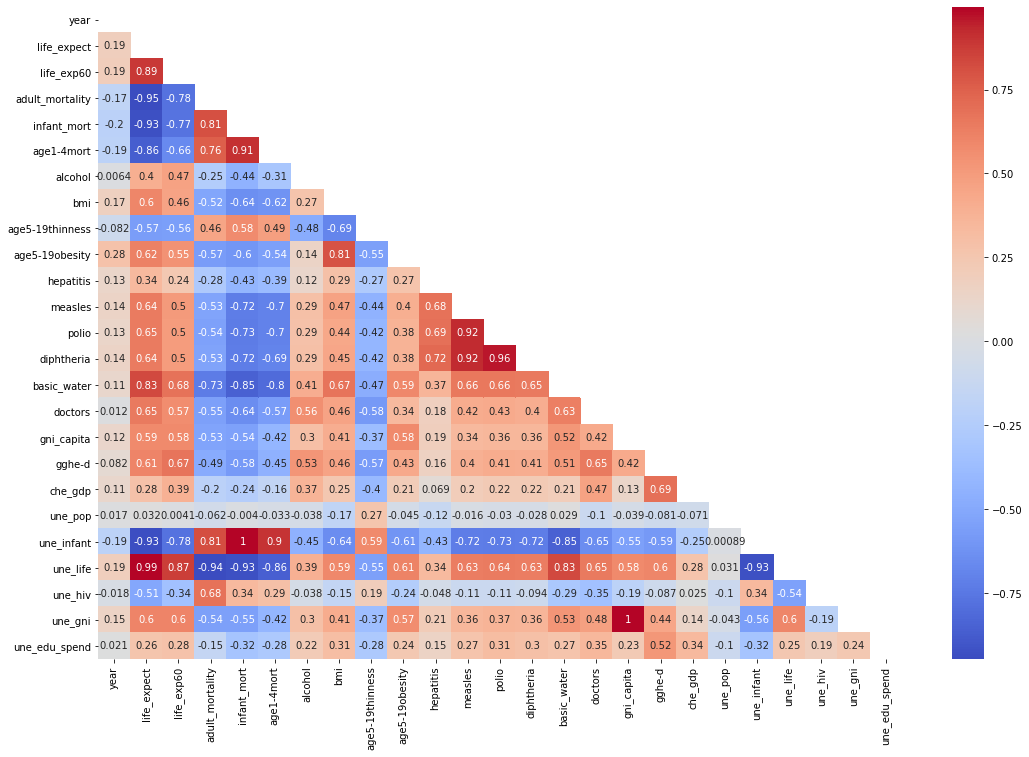

In [14]:
mask = np.triu(np.ones_like(data_df.corr()))
plt.subplots(figsize=(18,12))
dataplot = sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True, mask=mask)

**Nhận xét:**
Từ biểu đồ trên, ta có thể dự đoán rằng có nhiều thuộc tính "basic_water", "doctors","measles" ... có ảnh hưởng mạnh tới tuổi thọ.

## Sự phân bố tuổi thọ của các quốc gia

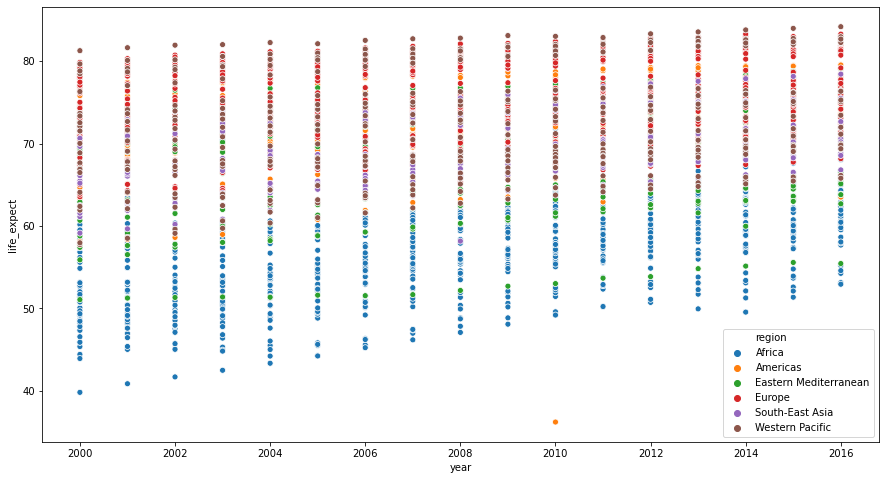

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data_df['year'],y=data_df['life_expect'],hue=data_df['region'])
plt.legend()
plt.show()

**Nhận xét:** Hầu hết các quốc gia ở phía Châu Âu và 1 số quốc gia ở phía Tây Thái Bình Dương có tuổi thọ trung bình cao hơn so với các khu vực còn lại trên thế giới.

## Mức độ biến động tuổi thọ trung bình của toàn thế giới là như thế nào?

In [16]:
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr

year
2000    66.381261
2001    66.759911
2002    66.981275
2003    67.194990
2004    67.536497
2005    67.918202
2006    68.382742
2007    68.817387
2008    69.228267
2009    69.679568
2010    69.912222
2011    70.457992
2012    70.722041
2013    71.026033
2014    71.225480
2015    71.476842
2016    71.787813
Name: life_expect, dtype: float64

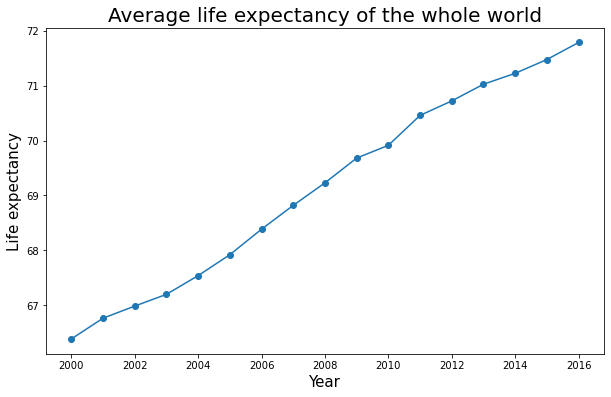

In [17]:
mean_life_expectancy_sr.plot.line(marker='o',figsize=(10,6))
plt.xlabel('Year',size=15)
plt.ylabel('Life expectancy',size=15)
plt.title('Average life expectancy of the whole world',size=20)
plt.show()

**Nhận xét:** Tuổi thọ trung bình của toàn thế giới tăng qua từng năm và đạt giá trị cao nhất vào năm 2016 với tuổi thọ trung bình là 71.8 tuổi.

In [18]:
life_expect_region_df = data_df.groupby('region').agg({'life_expect':'mean'}).rename(columns={'life_expect':'mean_life_expect'})
life_expect_region_df = life_expect_region_df.sort_values(by='mean_life_expect',ascending=False)
life_expect_region_df

,mean_life_expect
region,
Europe,75.805259
Americas,73.205263
Western Pacific,72.233377
Eastern Mediterranean,69.741827
South-East Asia,68.667484
Africa,57.679362


## Với mỗi châu lục, Tuổi thọ trung bình là như thế nào?

In [19]:
life_expectancy_country = data_df.groupby('country').agg({'life_expect':'mean'})
mean_expectancy_df = life_expectancy_country.rename(columns={'life_expect':'Mean life_expect'})
mean_expectancy_df.sort_values(by=['Mean life_expect'], ascending=False, inplace = True)

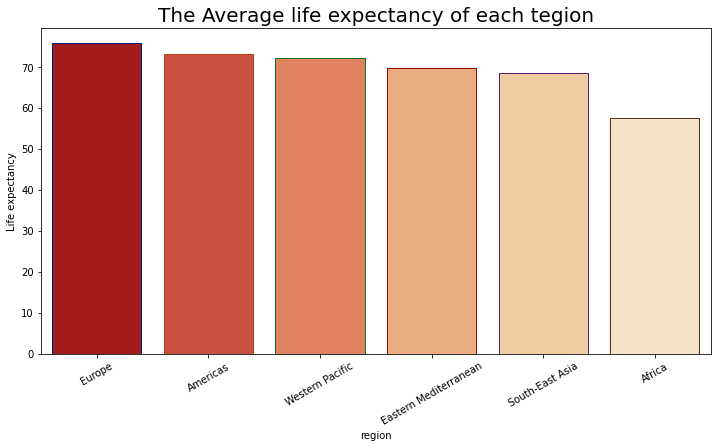

In [40]:
plt.subplots(figsize=(12,6))
sns.barplot(x=life_expect_region_df.index, y=life_expect_region_df['mean_life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.xticks(rotation=30)
plt.ylabel('Life expectancy')
plt.title('The Average life expectancy of each tegion', size=20)
plt.show()